<a href="https://colab.research.google.com/github/Tanisha2910/Predingting-house-prices-using-linear-regression/blob/master/Prdicting_house_prices_using_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Predicting House Prices Using Linear Regression**

In this project, we will work with housing data for the city of Ames, Iowa, United States from 2006 to 2010.

Each row in the dataset describes the properties of a single house, as well as the amount it was sold for. In this project, we will feature engineer and fit the data to a Linear Regression model, to predict the final sale prices for houses

We will follow these steps:

Acquire the data
Explore the data
Engineer and transform the features and the target variable
Build a model
Make and submit predictions


**Introduction to data set**

In [0]:
# import modules
import pandas as pd
import numpy as np

In [2]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [3]:
train = pd.read_csv('train.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


We will aim to predict the final price of each home

Looking at the data, we see features we expected, like 'YrSold' and 'SalePrice'. Others are unusual, such as 'LandSlope' (the slope of the land the home is built upon) and 'RoofMatl' (the materials used to construct the roof)

We should do some plotting during the exploration stage, so we need to import that functionality into our environment. Plotting allows us to visualize the distribution of the data, check for outliers, and see other patterns. We will use Matplotlib, a popular visualisation library

In [5]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv


In [6]:
test = pd.read_csv('test.csv')
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [0]:
import matplotlib.pyplot as plt
plt.style.use(style = 'ggplot')
plt.rcParams['figure.figsize'] = (10,6)

**DATA EXPLORATION AND FEATURE ENGINEERING**

This challenge is to predict the final sale price of the homes. this info is stored in 'Saleprice column'

In [8]:
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

We can see the average sale price of a house is close to 180,000 dollars, with most of the values falling within the 130,000 to 215,000 dollar range.

Next, we will check for skewness, which is a measure of the shape of the distribution of values.

When performing regression, it makes sense to log-transform the target variable when it is skewed. This is to improve the linearity of the data. The predictions generated by the final model will also be log-transformed, so we need to convert these predictions back to their original form later.

'np.log()' will transform the variable, and 'np.exp()' will reverse the transformation.

Skey is: 1.8828757597682129


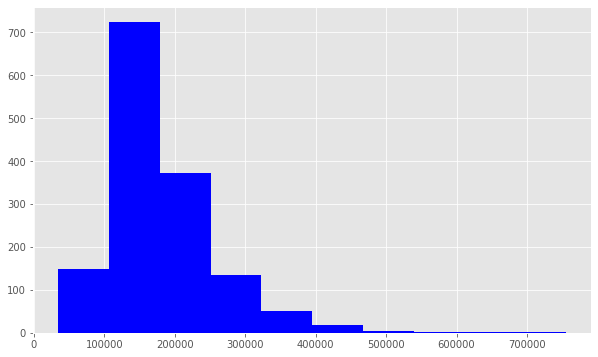

In [9]:
print("Skey is:", train.SalePrice.skew())
plt.hist(train.SalePrice, color='blue')
plt.show()

We can see longer tail in right so that means the distribution is positively skewed.

we can use np.log to transform 'SalePrice'

In [10]:
train.SalePrice.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [11]:
# Create a new series target of just the sale prices, transformed via log

target = np.log(train.SalePrice)
target.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

Now we can calculate the skewness of the 2nd line, and replot the data. 
A very closer to zero means that we have improved the skewness of the data

Skew is: 0.12133506220520406


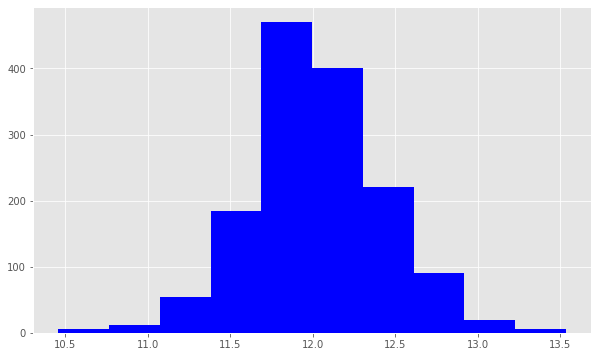

In [12]:
print("Skew is:", target.skew())
plt.hist(target, color = 'blue')
plt.show()

**Working with numeric features**
now we have converted the target variable, we will consider features. 
We will 1st check some numeric features, and make sone plots.

the 'select_dtypes' will return the subset of column matching the specified datatypes.

In [13]:
numeric_features = train.select_dtypes(include=[np.number])

# shows only the 1st 5 rows for numeric only columns
numeric_features.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [14]:
# Now show the datatypes of the numeric column
numeric_features.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

corr() will display the correlation between the columns . we will examine the correlation between the features and the target.


In [0]:
# Create a dataframe called 'corr' of all correlations
corr = numeric_features.corr()

In [16]:
# show the entire dataframe
corr

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,-0.005968,-0.007940,-0.015415,0.010496,0.005590,-0.044230,0.008273,0.002289,-0.020155,0.005587,0.006784,0.037719,0.002951,0.027239,-0.019772,0.000072,0.016570,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,0.085072,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,0.038469,0.402797,0.100949,-0.007234,0.198769,0.053532,0.263170,-0.006069,0.352096,0.266639,0.070250,0.285691,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.024947,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.547766,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.324297,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.825667,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.642277,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,0.174561,-0.069071,0.390857,0.085310,0.026673,0.276833,0.201444,0.102821,-0.037610,0.280682,0.249070,0.252691,0.364204,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.153484,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451

In [17]:
# show the top positively correlated and bottom negatively correlated fields
print(corr['SalePrice'].sort_values(ascending = False)[:5], '\n')
print(corr['SalePrice'].sort_values(ascending = False)[-5:])

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64 

YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


We should dig deeper on 'OverallQual'

In [18]:
train.OverallQual.unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2])

the 'OverallQual' data are integers in the interval of 1 to 10.

We will create a pivot table to further investigate the relationship between OverallQual and SalesPrice. 

We will set index = 'OverallQual' and values = 'SalePrice' and look at the median

In [0]:
quality_pivot = train.pivot_table(index='OverallQual', values='SalePrice', aggfunc=np.median)


In [20]:
quality_pivot

,SalePrice
OverallQual,
1,50150
2,60000
3,86250
4,108000
5,133000
6,160000
7,200141
8,269750
9,345000


to help visualize the pivot table, we can create a bar plot.

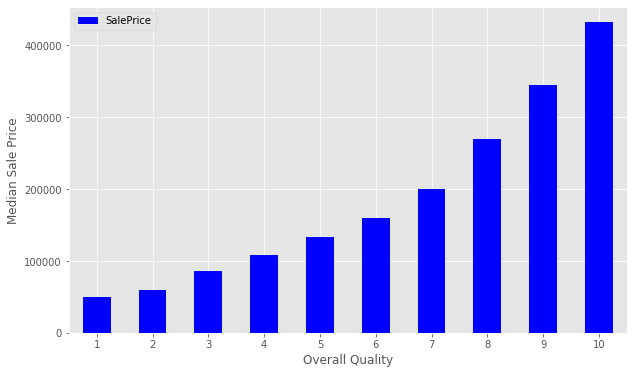

In [22]:
quality_pivot.plot(kind = 'bar', color = 'blue')
plt.xlabel('Overall Quality')
plt.ylabel('Median Sale Price')
plt.xticks(rotation = 0)
plt.show()

the median sale price increases as over qual increases.

We will use plt.scatter() to generate the scatter plots, to show the relationship between ground Living Area 'GrLivArea' and 'SalePrice' (the log transformed series)

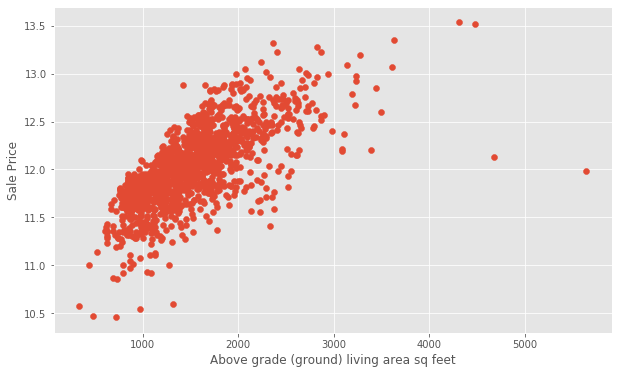

In [21]:
plt.scatter(x=train['GrLivArea'], y = target)
plt.ylabel('Sale Price')
plt.xlabel('Above grade (ground) living area sq feet')
plt.show()

We see that increase in living area corresponds to increase in price. We will do the same for garage area.

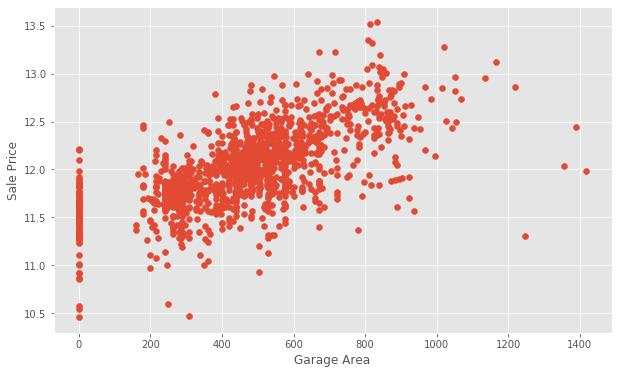

In [23]:
plt.scatter(x=train['GarageArea'], y=target)
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()

We can see there are many homes with 0 for Garage Area, indicating that they don't have a garage. There are a few outliers as well. Outliers can affect a regression model by pulling our estimated regression line further away from the true population regression line. So we will remove those observations. There are many techniques for dealing with outliers.

We will create a new dataframe with some outliers removed.

In [0]:
train = train[train['GarageArea'] < 1200]

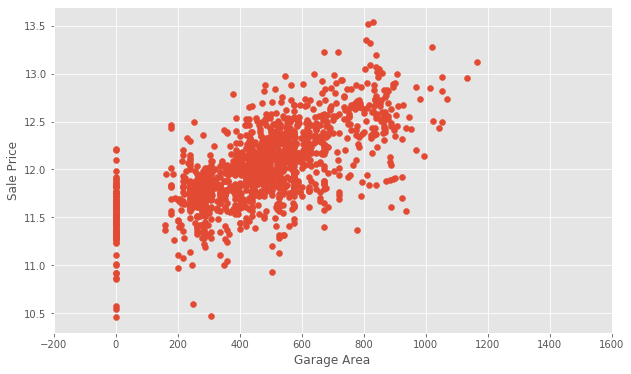

In [25]:
plt.scatter(x = train['GarageArea'], y = np.log(train.SalePrice))
plt.xlim(-200, 1600)  # this forces the same scale as before
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()

HANDLING NULL VALUES

We can create a dataframe to view the top null columns.

We will chain together the train.isnull.sum() method, we will return a series of counts of the nulll values in each column.


In [26]:
# Create a dataframe of nulls
nulls = pd.DataFrame(train.isnull().sum().sort_values(ascending = False)[:25])
nulls

,0
PoolQC,1449
MiscFeature,1402
Alley,1364
Fence,1174
FireplaceQu,689
LotFrontage,258
GarageCond,81
GarageType,81
GarageYrBlt,81
GarageFinish,81


In [27]:
# enhancing the dataframe with the column and index name
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
nulls

,Null Count
Feature,
PoolQC,1449
MiscFeature,1402
Alley,1364
Fence,1174
FireplaceQu,689
LotFrontage,258
GarageCond,81
GarageType,81
GarageYrBlt,81


For 'PoolQC' (Pool Quality), the value is NaN when PoolArea is 0, or there is no pool. There are similar relationship between many of the Garage-related columns

We will now look at 'MiscFeature'


In [28]:
print("Unique values are :", train.MiscFeature.unique())


Unique values are : [nan 'Shed' 'Gar2' 'Othr' 'TenC']


These values describe whether the house has a shed over 100 sqft, a second garage etc. We might want to use this information later. It's important to gather domain knowledge to make the best decisions when dealing with missing data.

**Examining the non numeric features**

In [29]:
# Select only the character fields

categoricals = train.select_dtypes(exclude=[np.number])
categoricals.describe()


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1455,1455,91,1455,1455,1455,1455,1455,1455,1455,1455,1455,1455,1455,1455,1455,1455,1447,1455,1455,1455,1418,1418,1417,1418,1417,1455,1455,1455,1454,1455,1455,766,1374,1374,1374,1374,1455,6,281,53,1455,1455
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,7,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal
freq,1147,1450,50,921,1309,1454,1048,1378,225,1257,1441,1216,722,1139,1430,514,503,863,905,1278,644,647,1306,951,428,1251,1423,737,1360,1329,733,1355,377,867,605,1306,1321,1335,2,157,48,1266,1196


'top' is the most commonly occuring value with the frequency of the top value shown by 'freq'.

for many of these features we use 'one hot encoding', which is the technique to transform categorical data into numbers, so that the model can understand weather or not particular observation fall into one category or another.


**Transforming and engineering features**

Any transformations applied to the training data before fitting the model must be applied to the test data.

Consider the 'Street' data, which indicates whether there is Gravel or Paved road access to the property.

In [30]:
print ("Original: \n") 
print (train.Street.value_counts(), "\n")

Original: 

Pave    1450
Grvl       5
Name: Street, dtype: int64 



In the street column, the unique features are Pave and Grvl.  Only 5 homes have gravel access.

Our model needs numerical data, so we will use one hot encoding to transform the data into boolean column.

We will create a new column called 'enc_street'. We will use the 'pd.get_dummies()' method to do this.

We need to do this on both the train and test data.

In [0]:
# We will create a new column called 'enc_street' consisting of 0s and 1s depending on the value in the 'Street' column.
train['enc_street'] = pd.get_dummies(train.Street, drop_first=True)
test['enc_street'] = pd.get_dummies(test.Street, drop_first=True)

In [32]:
# Test the new column to see whether the 0s and 1s have been added
train['enc_street'].head()

0    1
1    1
2    1
3    1
4    1
Name: enc_street, dtype: uint8

In [33]:
print ('Encoded: \n') 
print (train.enc_street.value_counts())

Encoded: 

1    1450
0       5
Name: enc_street, dtype: int64


We have engineered our first feature. Feature engineering is the process of making features of the data suitable for use in machine learning eg. when we encoded the Street feature into a column of Boolean values, we engineered a feature.

We will engineer another feature. We will look at 'SaleCondition' by constructing a pivot table, as we did above for 'OverallQual'



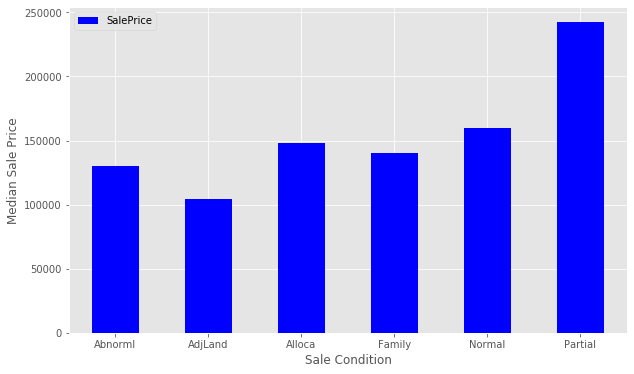

In [34]:
condition_pivot = train.pivot_table(index = 'SaleCondition', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind = 'bar', color = 'blue')
plt.xlabel('Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation = 0)
plt.show()

We can see that partial has higher mean price than others. We will encode this as a new feature. We will select all of the houses where Sale Condithion is equal to partial and assign the value as 1, otherwise 0.

In [0]:
# Create a function 'encode' that takes in a row value
def encode(x):
    return 1 if x == 'Partial' else 0

In [0]:
# Instead of usinf a dummy method, run the function above for each row
train['enc_condition'] = train.SaleCondition.apply(encode)
test['enc_condition'] = test.SaleCondition.apply(encode)

In [37]:
# Test the new column to see weather 1s and 0s have been added
train['enc_condition'].head(5)

0    0
1    0
2    0
3    0
4    0
Name: enc_condition, dtype: int64

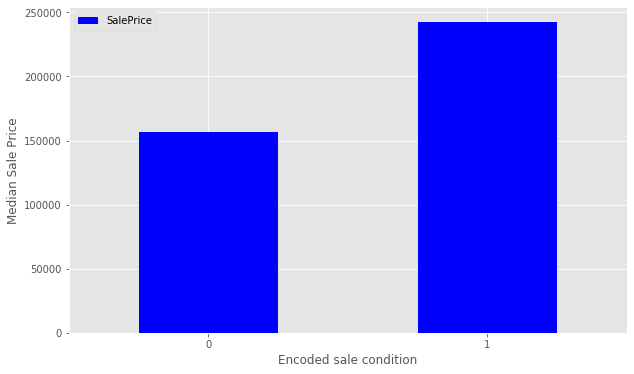

In [38]:
# Explore this new feature as a plot
condition_pivot = train.pivot_table(index = 'enc_condition', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind = 'bar', color = 'blue')
plt.xlabel('Encoded sale condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation = 0)
plt.show()

We can combine to work with more features to improve performance of the model. 

Before we prepare the data for modelling, we need to deal with missing values. We will fill the missing value with an average value, and then assign the results to the data. This is a method of 'interpolation using the dataframe 'interpolate method'.

In [0]:
data = train.select_dtypes(include=[np.number]).interpolate().dropna()

In [40]:
# check if all the columns have 0 null values
sum(data.isnull().sum() !=0)

0

**BUILT A LINEAR MODEL**

We will perform the final steps to prepare our data for modelling.  We will seperate the features and the target variables for modelling.

we will assign the features to 'X' and the target variables to 'y'.

we will use 'np.log' as explained above to transform the y variable of the model.

Also, 'data.drop([features], axis=1)' istructs which columns we want to exclude. We won't include SalePrice for obvious reasons, and 'Id' is just an index with no relationship to SalePrice.

In [0]:
y = np.log(train.SalePrice)


In [0]:
X = data.drop(['SalePrice', 'Id'], axis = 1)

We will partition the data and start modelling.

We will use train_test_split function to create a training and test set. Partitioning the data in this way allows us to evaluate how our model might perform on the data it's never seen before. If we train the model on all the test data it would be difficult to tell whether overfitting has taken place.

train_test_split returns 4 objects:

X_train is the subset of our features used for training.
X_test is the subset of which will be our 'hold-our' set - we use to test the model.
y_train is the target variable 'SalePrice' wich correspond to X_train.
y_test is the target variable 'SalePrice' which correspond to X_test.

The first parameter value 'X' denotes the set of predictor data, and 'y' is the target variable

Next, we set random_state=42. This provides for reproducible results, since the 'train_test_split' will randomly partition the data. The 'test_size' parameter tells the function what proportion of the data should be in the test partition. 33% of the data will be devoted to the hold-out set.

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = .33)

**Begin Modelling**

In [0]:
# We will 1st create a linear Regression Model. First we instantiate the model

from sklearn import linear_model
lr = linear_model.LinearRegression()

Next, we will fit te model, which is a procedure which varies for different models. Essentially we are estimating the relationship between our predictors and the target variable, so that we can make accurate predictions on new data.

We fit the model using X_train, y_train, and we'll score with X_test, y_test.

The 'lr.fir()' method will fit the linear regression on the features and target variable that will pass.


In [0]:
model = lr.fit(X_train, y_train)

**Evaluate the performance and visualize the results**

We should evaluate the perfoemance of the model. We will use the root-mean-square(RMSE)method. We will also look at the r-sq value.

The r-sq value is the measure of how close the test data is to the fitted regression line.  It take the value between 0 and 1.
1 means all the variation in the target is explained by the data.

In general the higher r-squared value means a better fit.

The 'model.score()' method returns the r-squared value by default.


In [46]:
# Show the r-squares() value
print("R^2 is: \n", model.score(X_test, y_test))

R^2 is: 
 0.8882477709262494


This means that our feature explains approximately 88% of variance in our target variable.

Next we will consider the rmse.  to do this, we will use the model to we will use nodel that we have built to make predictions on the test data.

In [0]:
predictions = model.predict(X_test)

The 'model.predict()' method will return a list of predictions given a set of predictors.

The 'mean_squared_error' function takes two arrays and calculates the rmse.

In [49]:
from sklearn.metrics import mean_squared_error
print("RMSE is: \n", mean_squared_error(y_test, predictions))

RMSE is: 
 0.017841794519568518


Interpreting this value is more intuitive that the r-squared value. The RMSE measures the distance between our predicted values and actual values.

We can view this relationship with a scatter plot

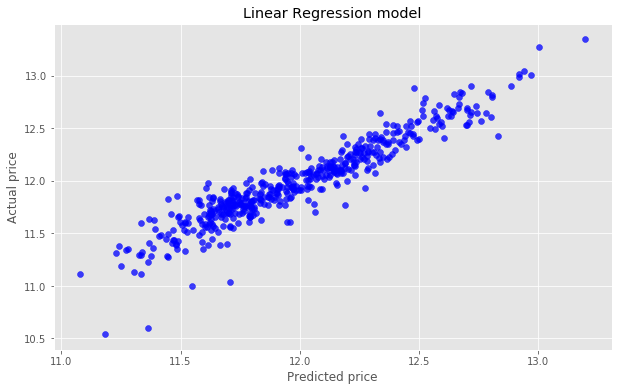

In [50]:
# Compare predictions with the actual values
actual_values = y_test
plt.scatter(predictions, actual_values, alpha = .75, color = 'b') # alpha helps to show the overlapping data
plt.xlabel('Predicted price')
plt.ylabel('Actual price')
plt.title('Linear Regression model')
plt.show()

If our predicted values were identical to the actual values, this graph would be the straight line y=x, because each predicted value x would be equal to each actual value y.

**Improving the model**

We will try using 'ridge regularization' to decrease the infuence of less important features. Ridge regularization is a process which shrinks the regression coefficients and less imp features.

We will once again instamtiate the model. The ridge regularisation model takes the parameter, alpha, which controls the strength of regularisations.

we will experiment by looping through a few values of alpha and see how it changes out results.


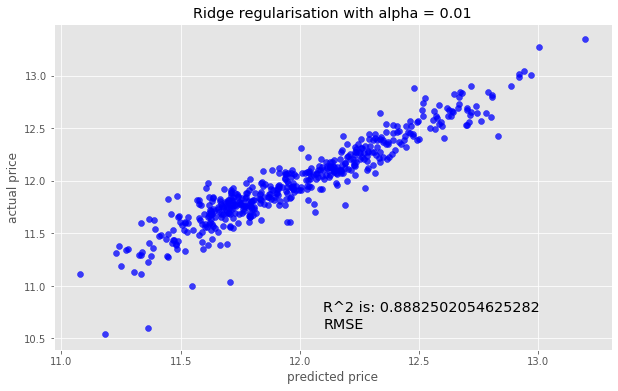

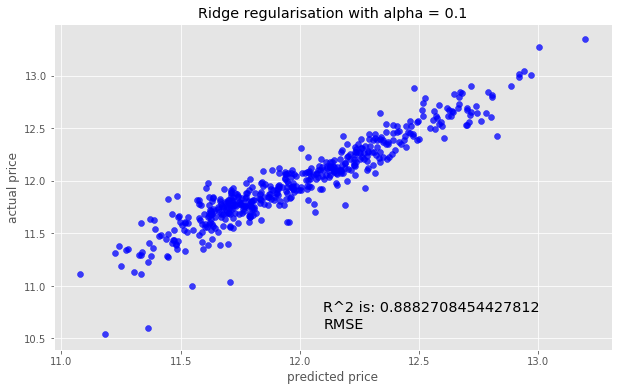

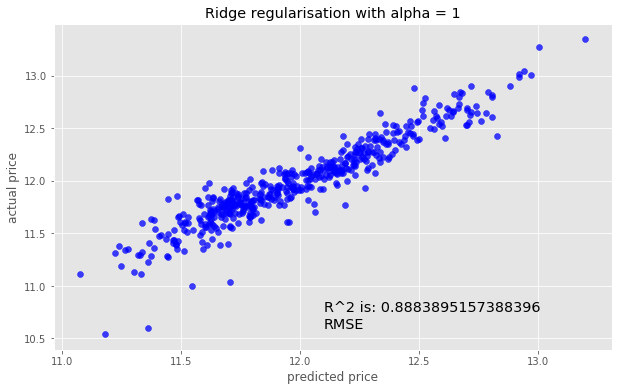

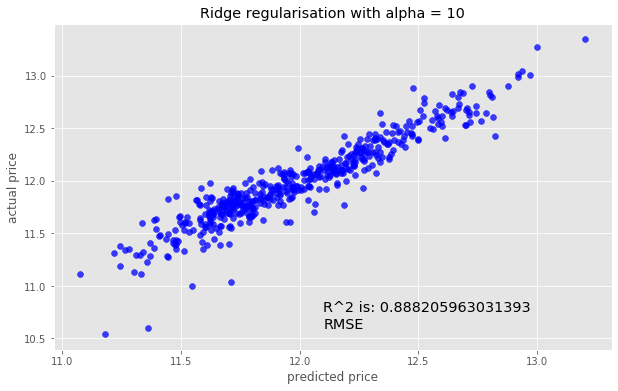

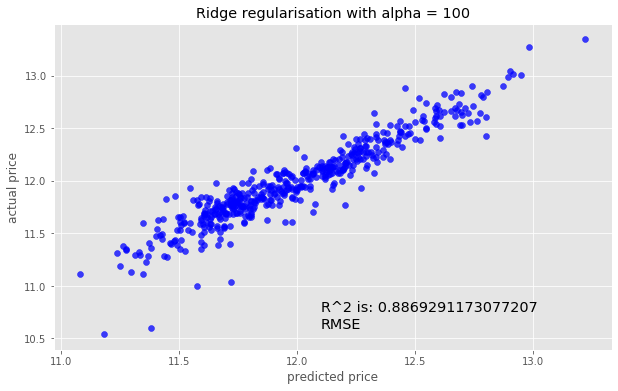

In [55]:
for i in range(-2, 3):
    alpha = 10**i
    rm = linear_model.Ridge(alpha = alpha)
    ridge_model = rm.fit(X_train, y_train)
    preds_ridge = ridge_model.predict(X_test)

    plt.scatter(preds_ridge, actual_values, alpha=.75, color='b')
    plt.xlabel('predicted price')
    plt.ylabel('actual price')
    plt.title('Ridge regularisation with alpha = {}'.format(alpha))
    overplay = 'R^2 is: {}\nRMSE'.format(ridge_model.score(X_test, y_test), mean_squared_error(y_test, preds_ridge))
    plt.annotate(s = overplay, xy=(12.1, 10.6),size = 'x-large')
    plt.show()

These models perform almost identically to the first model. In our case, adjusting the alpha did not substantially improve our model. As you add more features, regularisation can be helpful. We should repeat this step after we've added more features.